# AutoEncoder(AE)

* 입력데이터의 차원축소를 통해 의미있는 잠재 공간(Latent Space/Manifold)을 학습
 - Encoder 학습을 위해 Decoder를 사용

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Load MNIST Dataset

> ## 1) X_train and X_test

In [ ]:
# y는 훈련에 사용되지 않음, 이후 시각화시 레이블링에 활용
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

> ## 2) Normalization and Reshape

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# II. Keras Modeling with Functional API

> ## 1) 'Latent Space' Size

In [ ]:
encoding_dim = 3

> ## 2) Encoder

* Input

In [ ]:
from tensorflow.keras import layers

input_img = layers.Input(shape = (784, ))

* Encoding Layers and Encoding Model

In [ ]:
encoded = layers.Dense(256, activation = 'elu')(input_img)
encoded = layers.Dense(128, activation = 'elu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'elu')(encoded)

> ## 3) Decoder

* Decoding Lyaers and Decoding Model

In [ ]:
decoded = layers.Dense(128, activation = 'elu')(encoded)
decoded = layers.Dense(256, activation = 'elu')(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)

# III. AutoEncoder Model

> ## 1) 'autoencoder' Model

In [ ]:
from tensorflow.keras import models

autoencoder = models.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

> ## 2) 'encoder' Model

In [ ]:
encoder = models.Model(input_img, encoded)

In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________


> ## 3) 'decoder' Model

In [ ]:
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

In [ ]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 235,024
Trainable params: 235,024
Non-trainable params: 0
_________________________________________________________________


# IV. Model Fit

> ## 1) Model Compile

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

> ## 2) Model Training

* 약 2분

In [ ]:
# %%time

autoencoder.fit(X_train, X_train,
                epochs = 60,
                batch_size = 256,
                validation_data = (X_test, X_test))

Epoch 1/60
235/235 [==============================] - 1s 2ms/step - loss: 0.2391 - val_loss: 0.2000
Epoch 2/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1929 - val_loss: 0.1869
Epoch 3/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1842 - val_loss: 0.1819
Epoch 4/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1797 - val_loss: 0.1783
Epoch 5/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1766 - val_loss: 0.1759
Epoch 6/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1742 - val_loss: 0.1735
Epoch 7/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1722 - val_loss: 0.1722
Epoch 8/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1705 - val_loss: 0.1706
Epoch 9/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1689 - val_loss: 0.1689
Epoch 10/60
235/235 [==============================] - 0s 2ms/step - loss: 0.1676 - val_loss: 0.1677

# V. Model Predict

> ## 1) Imgae Encoding

* Create 'Latent Space'

In [ ]:
encoded_imgs = encoder.predict(X_test)

encoded_imgs.shape

313/313 [==============================] - 0s 478us/step


(10000, 3)

> ## 2) 'Latent Space' Decoding

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs.shape

313/313 [==============================] - 0s 436us/step


(10000, 784)

# VI. Visualization

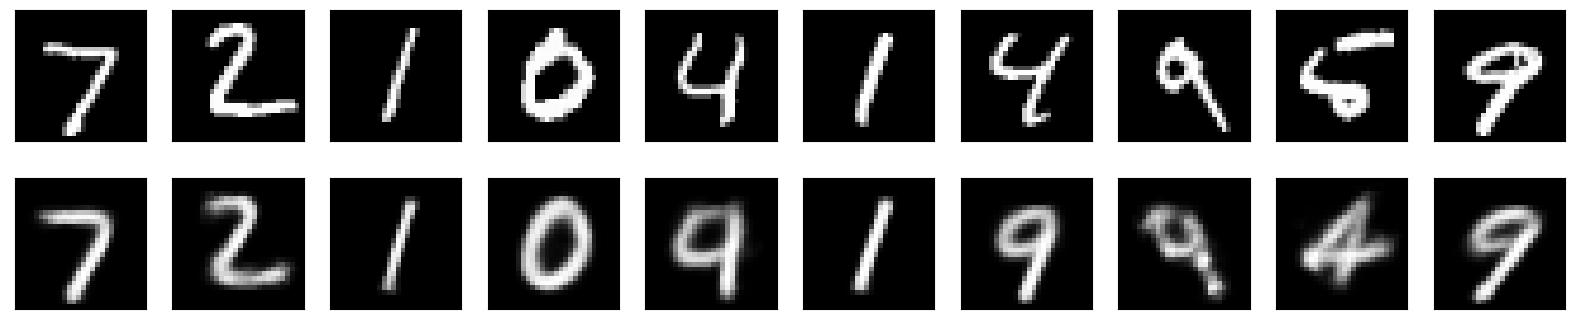

In [ ]:
## 1) decoder - 'decoder_imgs'

import matplotlib
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize = (20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

> ## 2) Latent Space - 'encoded_imgs'

In [ ]:
# !pip install ipympl

In [ ]:
# 관리자 권한으로 주피터 익스텐션 설정
# jupyter nbextension install --py --sys-prefix --overwrite ipympl
# jupyter nbextension enable --py --sys-prefix ipympl

In [ ]:
# %matplotlib inline - Figures are shown as static png images (optionally svg if configured)
# %matplotlib notebook or %matplotlib nbagg - Interactive Figures inside the notebook
# %matplotlib widgets - - Interactive Figures inside the notebook (requires jupyter-matplotlib to be installed)
# %matplotlib tk or %matplotlib qt etc. - GUI windows show the figure externally to the notebook with the given interactive backend
# %matplotlib inline # show 명령 없이도 바로 그래프 표현 (정적)
# %matplotlib notebook # show 명령 없이도 바로 그래프 표현 (동적)
%matplotlib widget

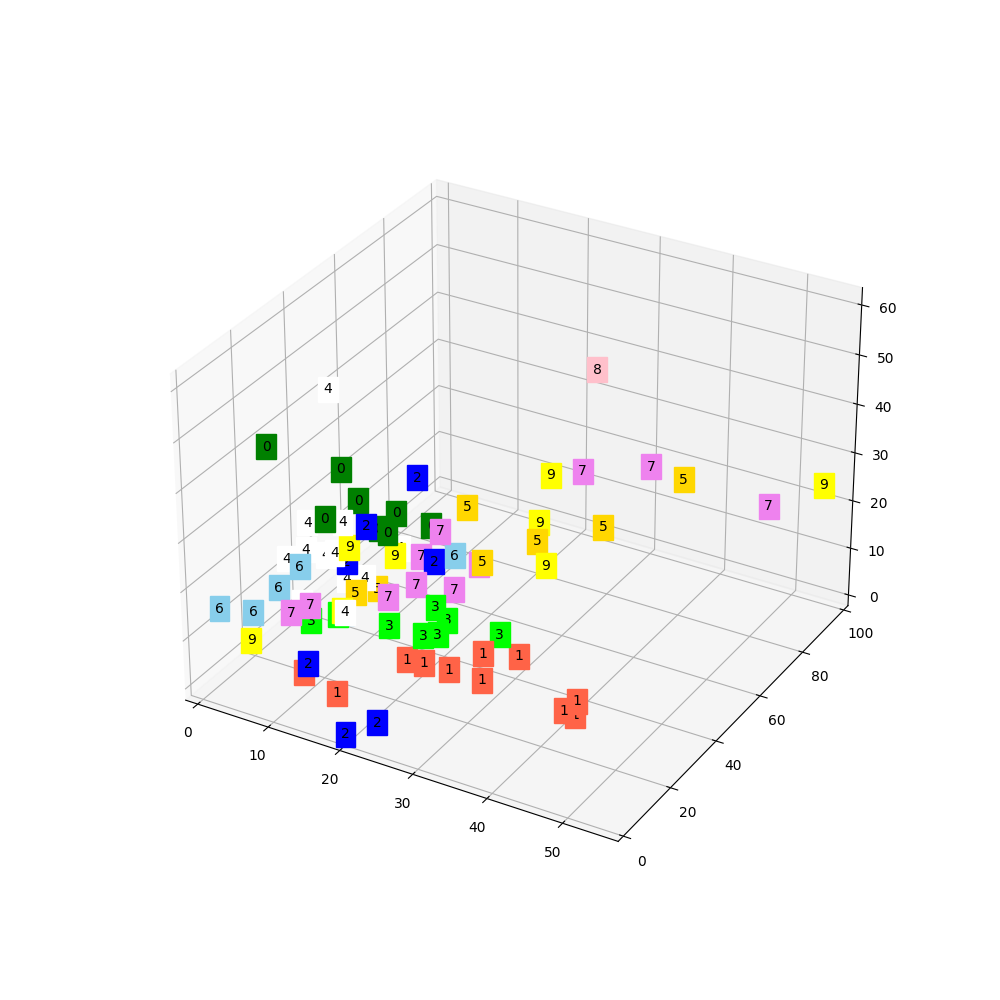

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams

rcParams['figure.figsize'] = (10, 10)
fig = plt.figure(1)#1
ax = fig.add_subplot(projection='3d')
# ax = Axes3D(fig)

xs = encoded_imgs[:80, 0]
ys = encoded_imgs[:80, 1]
zs = encoded_imgs[:80, 2]

color = ['green', 'tomato', 'blue', 'lime', 'white',
         'gold', 'skyblue', 'violet', 'pink', 'yellow']

for x, y, z, label in zip(xs, ys, zs, y_test):
    col = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor = col)

ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

# The End